In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

In [2]:
basics = pd.read_table('data/title.basics.tsv')
ratings = pd.read_table('data/title.ratings.tsv')

basics.set_index('tconst', inplace=True)
ratings.set_index('tconst', inplace=True)

GENRE = 'Sci-Fi'
mask = basics.genres.str.contains(GENRE).fillna(False)

scifi_basics = basics.loc[mask]
scifi_basics = scifi_basics.join(ratings)

scifi_movies = scifi_basics.loc[scifi_basics.titleType == 'movie']

nulls = (scifi_movies.startYear == '\\N') | (scifi_movies.averageRating.isnull() | scifi_movies.numVotes.isnull())

scifi_movies = scifi_movies.loc[~nulls]

scifi_movies['startYear'] = scifi_movies.startYear.astype(int)
scifi_movies['decade'] = scifi_movies.startYear//10*10
scifi_movies['qcent'] = scifi_movies.startYear//25*25

scifi_movies = scifi_movies.loc[scifi_movies.startYear < 2023]

print(len(scifi_movies))

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


6759


In [3]:
scifi_movies.head()

titleType                  primaryTitle  \
tconst                                              
tt0001993     movie                 L'électrocuté   
tt0004974     movie                 The Black Box   
tt0005615     movie             Life Without Soul   
tt0006333     movie  20,000 Leagues Under the Sea   
tt0006820     movie           Homunculus, 1. Teil   

                          originalTitle isAdult  startYear endYear  \
tconst                                                               
tt0001993                 L'électrocuté       0       1911      \N   
tt0004974                 The Black Box       0       1915      \N   
tt0005615             Life Without Soul       0       1915      \N   
tt0006333  20,000 Leagues Under the Sea       0       1916      \N   
tt0006820           Homunculus, 1. Teil       0       1916      \N   

          runtimeMinutes                   genres  averageRating  numVotes  \
tconst                                                                       
tt0001993             \N                   Sci-Fi            4.1      21.0   
tt0004974            195             Drama,Sci-Fi            2.9      26.0   
tt0005615             70      Drama,Horror,Sci-Fi            6.5      56.0   
tt0006333             85  Action,Adventure,Sci-Fi            6.1    1846.0   
tt0006820             69            Horror,Sci-Fi            5.9     102.0   

           decade  qcent  
tconst                    
tt0001993    1910   1900  
tt0004974    1910   1900  
tt0005615    1910   1900  
tt0006333    1910   1900  
tt0006820    1910   1900

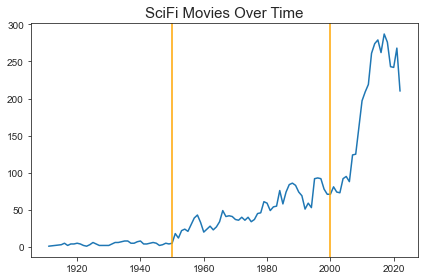

In [15]:
sns.set_style("ticks")
# chartdata = 
scifi_movies.startYear.value_counts().sort_index().plot()
plt.title('SciFi Movies Over Time', size=15)
# sns.lineplot(chartdata)
# chartdata
plt.axvline(1950, color='orange')
plt.axvline(2000, color='orange')
plt.tight_layout()

In [6]:
scifi_movies.describe(include='all').round(2)

titleType primaryTitle            originalTitle  isAdult  startYear  \
count       6759         6759                     6759   6759.0    6759.00   
unique         1         6554                     6593      3.0        NaN   
top        movie     Superman  Dr. Jekyll and Mr. Hyde      0.0        NaN   
freq        6759            5                        4   6683.0        NaN   
mean         NaN          NaN                      NaN      NaN    2000.06   
std          NaN          NaN                      NaN      NaN      20.84   
min          NaN          NaN                      NaN      NaN    1911.00   
25%          NaN          NaN                      NaN      NaN    1988.00   
50%          NaN          NaN                      NaN      NaN    2009.00   
75%          NaN          NaN                      NaN      NaN    2016.00   
max          NaN          NaN                      NaN      NaN    2022.00   

       endYear runtimeMinutes  genres  averageRating    numVotes   decade  \
count     6759           6759    6759        6759.00     6759.00  6759.00   
unique       1            154     142            NaN         NaN      NaN   
top         \N             90  Sci-Fi            NaN         NaN      NaN   
freq      6759            426     833            NaN         NaN      NaN   
mean       NaN            NaN     NaN           5.33    19271.47  1995.56   
std        NaN            NaN     NaN           1.47    99812.62    21.23   
min        NaN            NaN     NaN           1.10        5.00  1910.00   
25%        NaN            NaN     NaN           4.30       45.00  1980.00   
50%        NaN            NaN     NaN           5.40      257.00  2000.00   
75%        NaN            NaN     NaN           6.40     1568.50  2010.00   
max        NaN            NaN     NaN          10.00  2358645.00  2020.00   

         qcent  
count   6759.0  
unique     NaN  
top        NaN  
freq       NaN  
mean    1986.5  
std       20.0  
min     1900.0  
25%     1975.0  
50%     2000.0  
75%     2000.0  
max     2000.0

In [17]:
genres = set()
for s in scifi_movies.genres:
    for g in s.split(','):
        genres.add(g)
genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [18]:
genre_flags = pd.DataFrame(columns=genres, index=scifi_movies.index)
genre_flags

Mystery Sci-Fi Musical Animation Comedy Sport Thriller Action  \
tconst                                                                    
tt0001993     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt0004974     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt0005615     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt0006333     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt0006820     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
...           ...    ...     ...       ...    ...   ...      ...    ...   
tt9867616     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt9874290     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt9890758     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt9896768     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   
tt9899716     NaN    NaN     NaN       NaN    NaN   NaN      NaN    NaN   

          Romance Crime  ... Short Reality-TV Drama Horror Adult Adventure  \
tconst                   ...                                                 
tt0001993     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt0004974     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt0005615     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt0006333     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt0006820     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
...           ...   ...  ...   ...        ...   ...    ...   ...       ...   
tt9867616     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt9874290     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt9890758     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt9896768     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   
tt9899716     NaN   NaN  ...   NaN        NaN   NaN    NaN   NaN       NaN   

          Music Western Biography History  
tconst                                     
tt0001993   NaN     NaN       NaN     NaN  
tt0004974   NaN     NaN       NaN     NaN  
tt0005615   NaN     NaN       NaN     NaN  
tt0006333   NaN     NaN       NaN     NaN  
tt0006820   NaN     NaN       NaN     NaN  
...         ...     ...       ...     ...  
tt9867616   NaN     NaN       NaN     NaN  
tt9874290   NaN     NaN       NaN     NaN  
tt9890758   NaN     NaN       NaN     NaN  
tt9896768   NaN     NaN       NaN     NaN  
tt9899716   NaN     NaN       NaN     NaN  

[6759 rows x 25 columns]

In [19]:
for g in genres:
    genre_flags[g] = scifi_movies.genres.str.contains(g)
genre_flags.head()

Mystery  Sci-Fi  Musical  Animation  Comedy  Sport  Thriller  \
tconst                                                                    
tt0001993    False    True    False      False   False  False     False   
tt0004974    False    True    False      False   False  False     False   
tt0005615    False    True    False      False   False  False     False   
tt0006333    False    True    False      False   False  False     False   
tt0006820    False    True    False      False   False  False     False   

           Action  Romance  Crime  ...  Short  Reality-TV  Drama  Horror  \
tconst                             ...                                     
tt0001993   False    False  False  ...  False       False  False   False   
tt0004974   False    False  False  ...  False       False   True   False   
tt0005615   False    False  False  ...  False       False   True    True   
tt0006333    True    False  False  ...  False       False  False   False   
tt0006820   False    False  False  ...  False       False  False    True   

           Adult  Adventure  Music  Western  Biography  History  
tconst                                                           
tt0001993  False      False  False    False      False    False  
tt0004974  False      False  False    False      False    False  
tt0005615  False      False  False    False      False    False  
tt0006333  False       True  False    False      False    False  
tt0006820  False      False  False    False      False    False  

[5 rows x 25 columns]

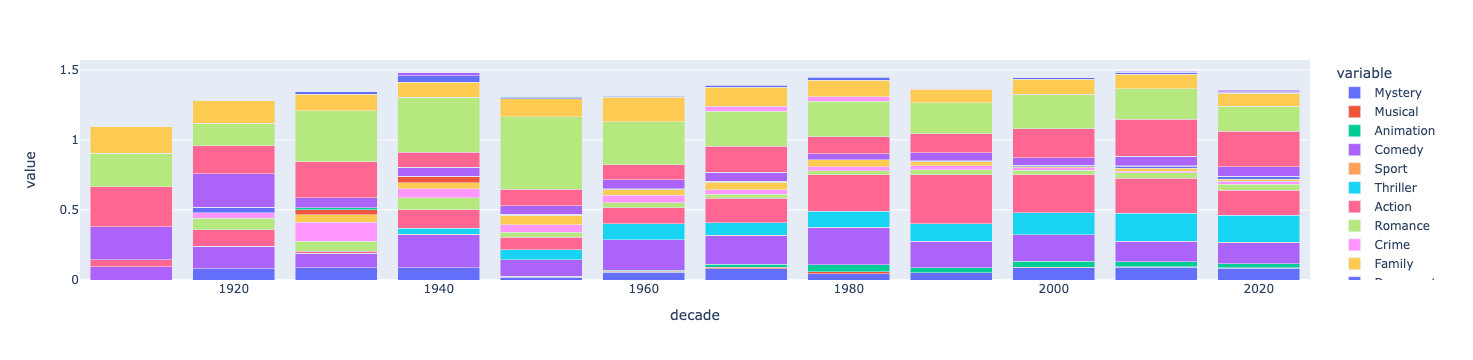

In [40]:
genre_counts = genre_flags.groupby(scifi_movies.decade).sum()
normed = genre_counts.div(scifi_movies.groupby('decade').size(), axis=0)
chartdata = normed
chartdata.pop('Sci-Fi')
px.bar(chartdata, barmode='stack')

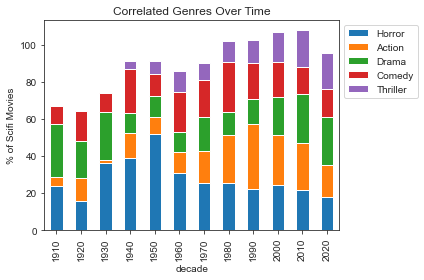

In [133]:
top_genres = genre_counts.sum().sort_values(ascending=False).index[1:6]
# px.bar(chartdata[top_genres], barmode='stack')
(chartdata[top_genres]*100).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=[1,1])
plt.title('Correlated Genres Over Time')
plt.ylabel('% of Scifi Movies')
plt.tight_layout()

<AxesSubplot:xlabel='decade'>

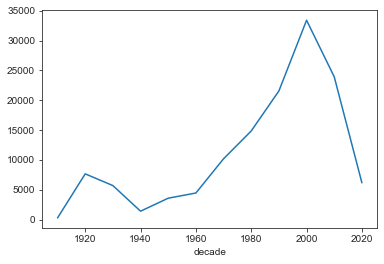

In [94]:
scifi_movies.groupby('decade').numVotes.mean().plot()

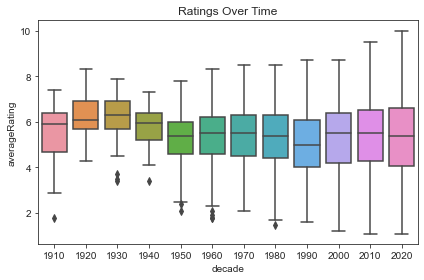

In [90]:
sns.boxplot(data=scifi_movies, x='decade', y='averageRating')
plt.title('Ratings Over Time')
plt.tight_layout()

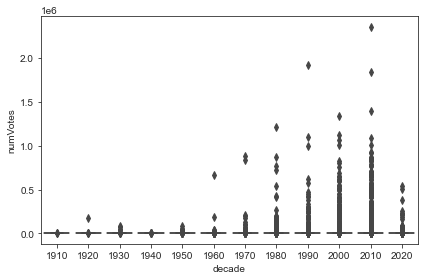

In [116]:
sns.boxplot(data=scifi_movies, x='decade', y='numVotes')
# plt.ylim([-1000,7000])
plt.tight_layout()

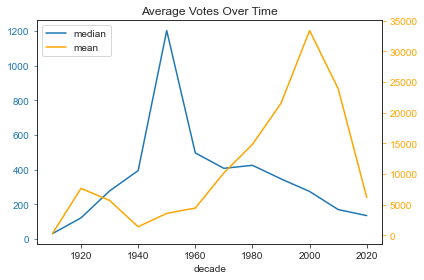

In [113]:
ax = scifi_movies.groupby('decade').numVotes.median().plot(label='median')
ax.tick_params(axis='y', colors='C0')

ax2 = ax.twinx()
scifi_movies.groupby('decade').numVotes.mean().plot(ax=ax2, color='orange', label='mean')
ax2.tick_params(axis='y', colors='orange')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title('Average Votes Over Time')
plt.tight_layout()

In [68]:
scifi_movies['runtimeMinutes'] = scifi_movies.runtimeMinutes.map(lambda x: np.nan if x == '\\N' else x)

(25.0, 180.0)

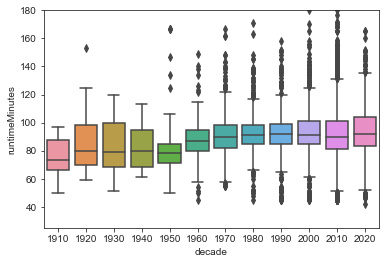

In [89]:
sns.boxplot(data=scifi_movies, x='decade', y='runtimeMinutes')
plt.ylim([25, 180])

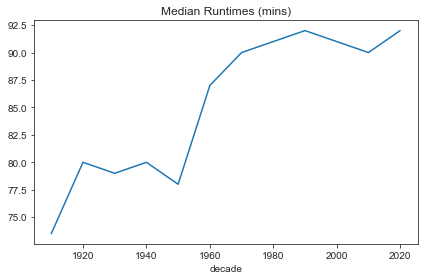

In [80]:
scifi_movies.groupby('decade').runtimeMinutes.median().plot()
plt.title('Median Runtimes (mins)')
plt.tight_layout()

In [136]:
scifi_movies.sort_values(by='numVotes', ascending=False).head(5)

titleType  primaryTitle originalTitle isAdult  startYear endYear  \
tconst                                                                       
tt1375666     movie     Inception     Inception       0       2010      \N   
tt0133093     movie    The Matrix    The Matrix       0       1999      \N   
tt0816692     movie  Interstellar  Interstellar       0       2014      \N   
tt0848228     movie  The Avengers  The Avengers       0       2012      \N   
tt0482571     movie  The Prestige  The Prestige       0       2006      \N   

           runtimeMinutes                   genres  averageRating   numVotes  \
tconst                                                                         
tt1375666           148.0  Action,Adventure,Sci-Fi            8.8  2358645.0   
tt0133093           136.0            Action,Sci-Fi            8.7  1917652.0   
tt0816692           169.0   Adventure,Drama,Sci-Fi            8.6  1838924.0   
tt0848228           143.0  Action,Adventure,Sci-Fi            8.0  1394907.0   
tt0482571           130.0     Drama,Mystery,Sci-Fi            8.5  1337392.0   

           decade  qcent  
tconst                    
tt1375666    2010   2000  
tt0133093    1990   1975  
tt0816692    2010   2000  
tt0848228    2010   2000  
tt0482571    2000   2000

In [ ]:
sns.distplot(scifi_movies.numVotes)
plt.title('Ratings Distribution')
plt.tight_layout()

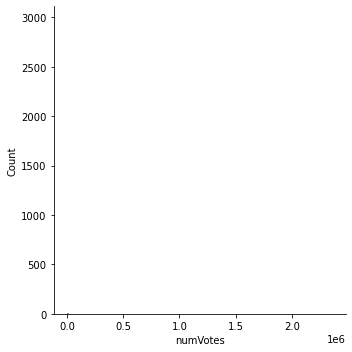

In [50]:
sns.displot(scifi_movies.numVotes)

In [58]:
axes

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



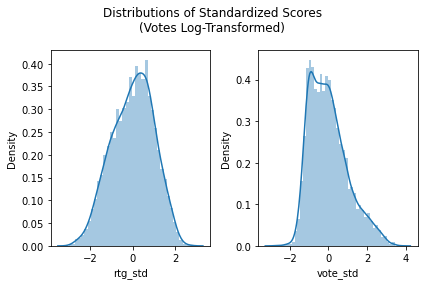

In [70]:
fig, axes = plt.subplots(1,2)

sns.distplot(scifi_movies.rtg_std, ax=axes[0])
sns.distplot(scifi_movies.vote_std, ax=axes[1])


plt.suptitle('Distributions of Standardized Scores\n(Votes Log-Transformed)')
plt.tight_layout()


In [40]:
scifi_movies.rtg_std.skew()

-0.19135517771033866

In [41]:
scifi_movies.vote_std.skew()

6.3102924993030145

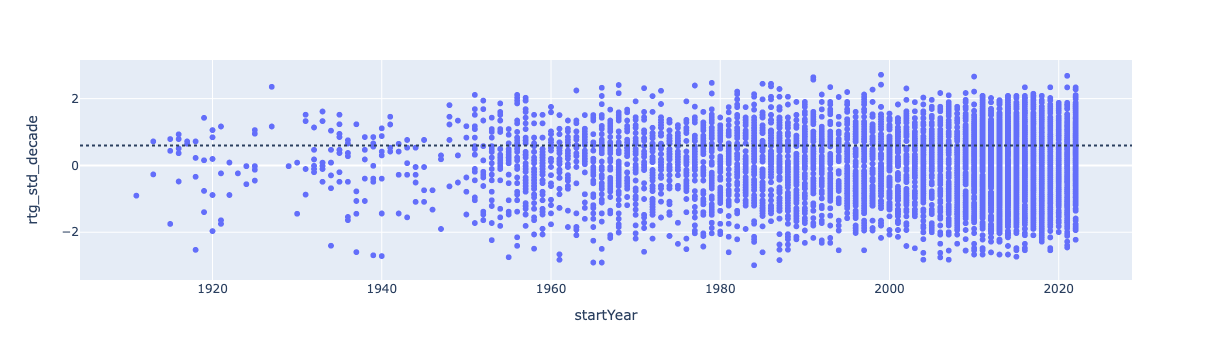

In [75]:
def compute_score(grp, suffix=''):
    
    rtg_std = (grp.averageRating - grp.averageRating.mean()) / grp.averageRating.std()
    vote_std = (np.log1p(grp.numVotes) - np.log1p(grp.numVotes).mean()) / np.log1p(grp.numVotes).std()
#     vote_std = (grp.numVotes - grp.numVotes.mean()) / grp.numVotes.std()
    
    grp['rtg_std' + suffix] = rtg_std
    grp['vote_std' + suffix] = vote_std
    grp['score' + suffix] = 0*rtg_std + 1*vote_std
    
    return grp

scifi_movies = scifi_movies.groupby('startYear').apply(compute_score)
scifi_movies = scifi_movies.groupby('decade').apply(compute_score, suffix='_decade')
scifi_movies = scifi_movies.groupby('qcent').apply(compute_score, suffix='_qcent')

fig = px.scatter(scifi_movies, 'startYear', 'rtg_std_decade', hover_name='primaryTitle')

fig.add_hline(y=0.6, line_dash="dot",
#               annotation_text="Jan 1, 2018 baseline", 
#               annotation_position="bottom right",
#               annotation_font_size=20,
#               annotation_font_color="blue"
             )

In [74]:
scifi_movies.rtg_std.median()

0.07351771459106884

In [73]:
scifi_movies.vote_std.median()

-0.14027680262089046

In [5]:
scifi_movies.head()

titleType                  primaryTitle  \
tconst                                              
tt0001993     movie                 L'électrocuté   
tt0004974     movie                 The Black Box   
tt0005615     movie             Life Without Soul   
tt0006333     movie  20,000 Leagues Under the Sea   
tt0006820     movie           Homunculus, 1. Teil   

                          originalTitle isAdult  startYear endYear  \
tconst                                                               
tt0001993                 L'électrocuté       0       1911      \N   
tt0004974                 The Black Box       0       1915      \N   
tt0005615             Life Without Soul       0       1915      \N   
tt0006333  20,000 Leagues Under the Sea       0       1916      \N   
tt0006820           Homunculus, 1. Teil       0       1916      \N   

          runtimeMinutes                   genres  averageRating  numVotes  \
tconst                                                                       
tt0001993             \N                   Sci-Fi            4.1      21.0   
tt0004974            195             Drama,Sci-Fi            2.9      26.0   
tt0005615             70      Drama,Horror,Sci-Fi            6.5      56.0   
tt0006333             85  Action,Adventure,Sci-Fi            6.1    1846.0   
tt0006820             69            Horror,Sci-Fi            5.9     102.0   

           ...  qcent   rtg_std  vote_std     score  rtg_std_decade  \
tconst     ...                                                        
tt0001993  ...   1900       NaN       NaN       NaN       -0.904050   
tt0004974  ...   1900 -1.145174 -0.725866 -1.040347       -1.750966   
tt0005615  ...   1900  0.700778  1.140647  0.810745        0.789783   
tt0006333  ...   1900  0.153393  1.758409  0.554647        0.507478   
tt0006820  ...   1900 -0.102262 -0.486588 -0.198343        0.366325   

           vote_std_decade  score_decade  rtg_std_qcent  vote_std_qcent  \
tconst                                                                    
tt0001993        -0.444290     -0.789110      -1.187113       -0.340884   
tt0004974        -0.435936     -1.422209      -2.160231       -0.335927   
tt0005615        -0.385810      0.495885       0.759122       -0.306187   
tt0006333         2.605034      1.031867       0.434749        1.468314   
tt0006820        -0.308950      0.197506       0.272563       -0.260585   

           score_qcent  
tconst                  
tt0001993    -0.975556  
tt0004974    -1.704155  
tt0005615     0.492795  
tt0006333     0.693140  
tt0006820     0.139276  

[5 rows x 21 columns]

In [152]:
def pick_max(grp, by='score', n=1):
    return grp.sort_values(by=by).tail(n).primaryTitle

mask = scifi_movies.startYear.between(1900, 1949)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=1)
top_movies = tmp

mask = scifi_movies.startYear.between(1950, 1969)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=2)
top_movies = pd.concat([top_movies, tmp])

mask = scifi_movies.startYear.between(1970, 1999)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=3)
top_movies = pd.concat([top_movies, tmp])

mask = scifi_movies.startYear.between(2000, 2023)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=4)
top_movies = pd.concat([top_movies, tmp])

top_movies = top_movies.reset_index()

scifi_movies['in_top'] = scifi_movies.index.isin(top_movies.tconst)

top_movies

decade      tconst                           primaryTitle
0     1910   tt0010600                               The Doll
1     1920   tt0017136                             Metropolis
2     1930   tt0024216                              King Kong
3     1940   tt0033553                Dr. Jekyll and Mr. Hyde
4     1950   tt0049366         Invasion of the Body Snatchers
5     1950   tt0043456          The Day the Earth Stood Still
6     1960   tt0063442                     Planet of the Apes
7     1960   tt0062622                  2001: A Space Odyssey
8     1970   tt0079501                                Mad Max
9     1970   tt0066921                     A Clockwork Orange
10    1970   tt0078748                                  Alien
11    1980   tt0083658                           Blade Runner
12    1980   tt0088247                         The Terminator
13    1980   tt0088763                     Back to the Future
14    1990   tt0107290                          Jurassic Park
15    1990   tt0103064             Terminator 2: Judgment Day
16    1990   tt0133093                             The Matrix
17    2000   tt0338013  Eternal Sunshine of the Spotless Mind
18    2000   tt0371746                               Iron Man
19    2000   tt0434409                         V for Vendetta
20    2000   tt0482571                           The Prestige
21    2010   tt4154756                 Avengers: Infinity War
22    2010   tt0848228                           The Avengers
23    2010   tt0816692                           Interstellar
24    2010   tt1375666                              Inception
25    2020  tt10838180               The Matrix Resurrections
26    2020   tt3480822                            Black Widow
27    2020   tt6723592                                  Tenet
28    2020  tt11286314                          Don't Look Up

In [160]:
scifi_movies.loc[scifi_movies.decade == 2020].sort_values(by='score_decade', ascending=False).head(10)

titleType                 primaryTitle  \
tconst                                              
tt11286314     movie                Don't Look Up   
tt6723592      movie                        Tenet   
tt3480822      movie                  Black Widow   
tt10838180     movie     The Matrix Resurrections   
tt8332922      movie        A Quiet Place Part II   
tt7097896      movie  Venom: Let There Be Carnage   
tt5034838      movie            Godzilla vs. Kong   
tt10954984     movie                         Nope   
tt8041270      movie     Jurassic World: Dominion   
tt7550000      movie                Project Power   

                          originalTitle isAdult  startYear endYear  \
tconst                                                               
tt11286314                Don't Look Up       0       2021      \N   
tt6723592                         Tenet       0       2020      \N   
tt3480822                   Black Widow       0       2021      \N   
tt10838180     The Matrix Resurrections       0       2021      \N   
tt8332922         A Quiet Place Part II       0       2020      \N   
tt7097896   Venom: Let There Be Carnage       0       2021      \N   
tt5034838             Godzilla vs. Kong       0       2021      \N   
tt10954984                         Nope       0       2022      \N   
tt8041270      Jurassic World: Dominion       0       2022      \N   
tt7550000                 Project Power       0       2020      \N   

           runtimeMinutes                   genres  averageRating  numVotes  \
tconst                                                                        
tt11286314            138      Comedy,Drama,Sci-Fi            7.2  540466.0   
tt6723592             150   Action,Sci-Fi,Thriller            7.3  510284.0   
tt3480822             134  Action,Adventure,Sci-Fi            6.7  381949.0   
tt10838180            148            Action,Sci-Fi            5.7  252448.0   
tt8332922              97      Drama,Horror,Sci-Fi            7.2  233325.0   
tt7097896              97  Action,Adventure,Sci-Fi            5.9  227163.0   
tt5034838             113   Action,Sci-Fi,Thriller            6.3  211973.0   
tt10954984            130    Horror,Mystery,Sci-Fi            6.9  188829.0   
tt8041270             147  Action,Adventure,Sci-Fi            5.6  161939.0   
tt7550000             113      Action,Crime,Sci-Fi            6.0   90240.0   

            ...   rtg_std  vote_std     score  rtg_std_decade  \
tconst      ...                                                 
tt11286314  ...  1.156976  3.253073  3.253073        1.066756   
tt6723592   ...  1.365838  3.363302  3.363302        1.124492   
tt3480822   ...  0.876167  3.107808  3.107808        0.778075   
tt10838180  ...  0.314548  2.934532  2.934532        0.200713   
tt8332922   ...  1.302723  3.021278  3.021278        1.066756   
tt7097896   ...  0.426872  2.890369  2.890369        0.316186   
tt5034838   ...  0.651519  2.861408  2.861408        0.547130   
tt10954984  ...  0.593924  3.313799  3.313799        0.893547   
tt8041270   ... -0.157774  3.244900  3.244900        0.142977   
tt7550000   ...  0.545344  2.606080  2.606080        0.373922   

            vote_std_decade  score_decade  rtg_std_qcent  vote_std_qcent  \
tconst                                                                     
tt11286314         3.421113      3.421113       1.181325        2.773620   
tt6723592          3.396419      3.396419       1.245130        2.752384   
tt3480822          3.271935      3.271935       0.862299        2.645335   
tt10838180         3.093992      3.093992       0.224249        2.492315   
tt8332922          3.060141      3.060141       1.181325        2.463205   
tt7097896          3.048639      3.048639       0.351859        2.453315   
tt5034838          3.018898      3.018898       0.607079        2.427739   
tt10954984         2.969214      2.969214       0.989909        2.385014   
tt8041270          2.903199      2.903199  

In [156]:
scifi_movies.loc[scifi_movies.in_top].sort_values('startYear')[['primaryTitle', 'startYear']]

primaryTitle  startYear
tconst                                                      
tt0010600                                The Doll       1919
tt0017136                              Metropolis       1927
tt0024216                               King Kong       1933
tt0033553                 Dr. Jekyll and Mr. Hyde       1941
tt0043456           The Day the Earth Stood Still       1951
tt0049366          Invasion of the Body Snatchers       1956
tt0062622                   2001: A Space Odyssey       1968
tt0063442                      Planet of the Apes       1968
tt0066921                      A Clockwork Orange       1971
tt0078748                                   Alien       1979
tt0079501                                 Mad Max       1979
tt0083658                            Blade Runner       1982
tt0088247                          The Terminator       1984
tt0088763                      Back to the Future       1985
tt0103064              Terminator 2: Judgment Day       1991
tt0107290                           Jurassic Park       1993
tt0133093                              The Matrix       1999
tt0338013   Eternal Sunshine of the Spotless Mind       2004
tt0434409                          V for Vendetta       2005
tt0482571                            The Prestige       2006
tt0371746                                Iron Man       2008
tt1375666                               Inception       2010
tt0848228                            The Avengers       2012
tt0816692                            Interstellar       2014
tt4154756                  Avengers: Infinity War       2018
tt6723592                                   Tenet       2020
tt10838180               The Matrix Resurrections       2021
tt11286314                          Don't Look Up       2021
tt3480822                             Black Widow       2021

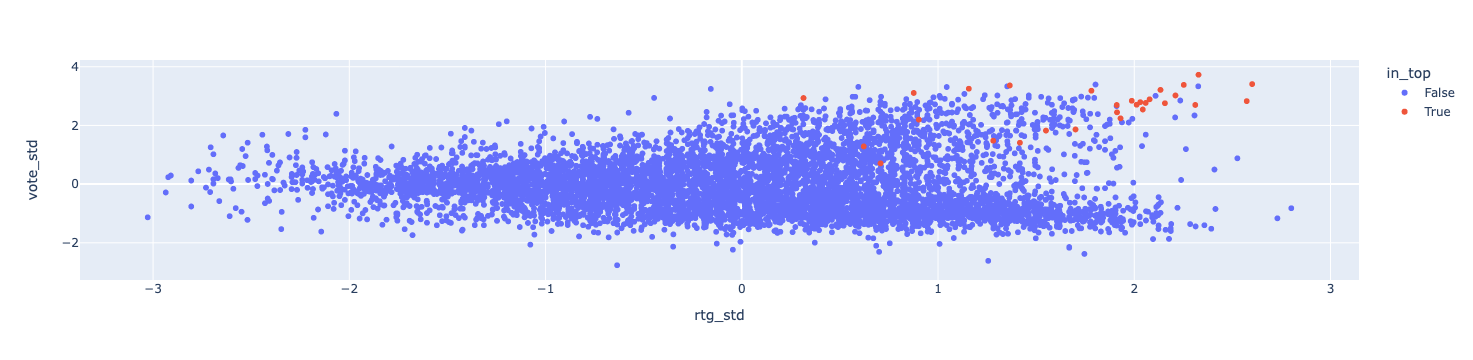

In [88]:
px.scatter(scifi_movies, 'rtg_std', 'vote_std', color='in_top', hover_name='primaryTitle')


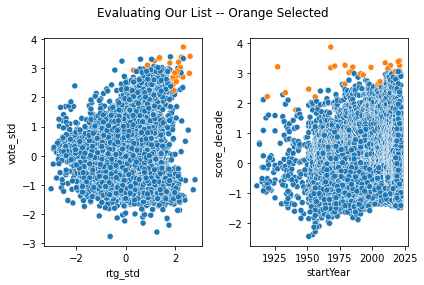

In [185]:
# mask = scifi_movies.numVotes > 100
# chartdata = scifi_movies[mask]

fig, axes = plt.subplots(1,2)

sns.scatterplot(x=scifi_movies.rtg_std, y=scifi_movies.vote_std, hue=scifi_movies.in_top, ax=axes[0])




# plt.legend().remove()
# plt.title('Standardized Scores Scatter\n(Orange In List)')
# plt.tight_layout()

sns.scatterplot(x=scifi_movies.startYear, y=scifi_movies.score_decade, hue=scifi_movies.in_top, ax=axes[1])

axes[0].legend().remove()
axes[1].legend().remove()

plt.suptitle('Evaluating Our List -- Orange Selected')
# plt.legend().remove()
# plt.title('Scores Over Time\n(Orange In List)')
plt.tight_layout()

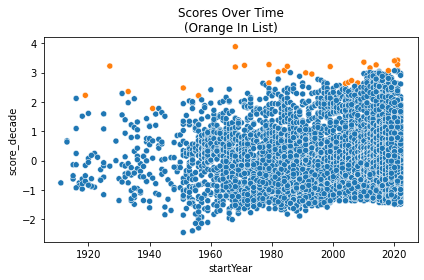

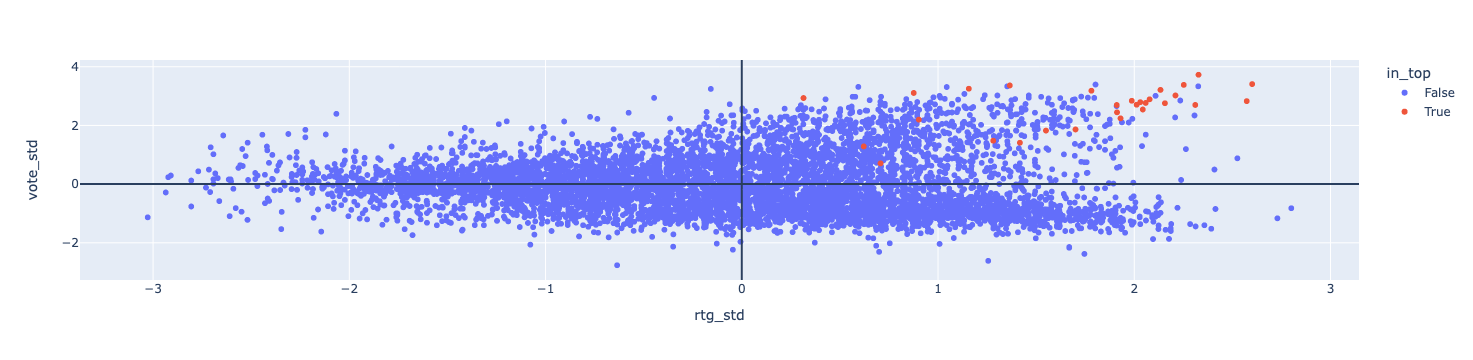

In [192]:
# mask = scifi_movies.numVotes > 100
fig = px.scatter(scifi_movies, 'rtg_std', 'vote_std', hover_name='primaryTitle', color='in_top')

fig.add_hline(y=0)
fig.add_vline(x=0)

In [190]:
scifi_movies.loc[scifi_movies.primaryTitle == 'Joker']

titleType primaryTitle originalTitle isAdult  startYear endYear  \
tconst                                                                      
tt1918886     movie        Joker         Joker       0       2012      \N   

          runtimeMinutes                genres  averageRating  numVotes  ...  \
tconst                                                                   ...   
tt1918886            104  Comedy,Family,Sci-Fi            2.4    5631.0  ...   

            rtg_std  vote_std     score  rtg_std_decade  vote_std_decade  \
tconst                                                                     
tt1918886 -2.022433  1.139334  1.139334       -1.897357         1.112349   

           score_decade  rtg_std_qcent  vote_std_qcent  score_qcent  in_top  
tconst                                                                       
tt1918886      1.112349      -1.881316         1.08704      1.08704   False  

[1 rows x 22 columns]

In [125]:
scifi_movies.sort_values('score', ascending=False).head(5).primaryTitle

tconst
tt1375666                     Inception
tt0103064    Terminator 2: Judgment Day
tt3315342                         Logan
tt0062622         2001: A Space Odyssey
tt6723592                         Tenet
Name: primaryTitle, dtype: object

In [126]:
scifi_movies.sort_values('score', ascending=True).head(5).primaryTitle

tconst
tt0051935                      Missile Monsters
tt0051030                         El superflaco
tt0764900                            Tokyo 1960
tt0055137             Der Mann mit dem Objektiv
tt0061821    Javier y los invasores del espacio
Name: primaryTitle, dtype: object

In [137]:
mask = (chartdata.rtg_std > 1) & (chartdata.vote_std < 0)
chartdata[mask]

titleType                               primaryTitle  \
tconst                                                           
tt0034260     movie                        Tainstvennyy ostrov   
tt0042211     movie                      Atom Man vs. Superman   
tt0044412     movie                      The Beautiful Dreamer   
tt0052138     movie                           Doroga k zvezdam   
tt0062508     movie                           Ego zvali Robert   
...             ...                                        ...   
tt4164442     movie                              ANI: A Parody   
tt5252440     movie  Hot Wheels Acceleracers the Ultimate Race   
tt5696110     movie                RiffTrax Live: Time Chasers   
tt7918178     movie                                    Spheres   
tt7987842     movie                                    Zayed 9   

                                       originalTitle isAdult  startYear  \
tconst                                                                    
tt0034260                        Tainstvennyy ostrov       0       1941   
tt0042211                      Atom Man vs. Superman       0       1950   
tt0044412                         El bello durmiente       0       1952   
tt0052138                           Doroga k zvezdam       0       1957   
tt0062508                           Ego zvali Robert       0       1967   
...                                              ...     ...        ...   
tt4164442                              ANI: A Parody       0       2014   
tt5252440  Hot Wheels Acceleracers the Ultimate Race       0       2005   
tt5696110                RiffTrax Live: Time Chasers       0       2016   
tt7918178                                    Spheres       0       2018   
tt7987842                                    Zayed 9       0       2021   

          endYear runtimeMinutes                   genres  averageRating  \
tconst                                                                     
tt0034260      \N             75  Adventure,Family,Sci-Fi            7.0   
tt0042211      \N            252            Family,Sci-Fi            6.7   
tt0044412      \N             75    Comedy,Fantasy,Sci-Fi            7.6   
tt0052138      \N             52         Biography,Sci-Fi            7.2   
tt0062508      \N             93            Comedy,Sci-Fi            6.6   
...           ...            ...                      ...            ...   
tt4164442      \N            122    Comedy,Musical,Sci-Fi            7.1   
tt5252440      \N             60  Action,Animation,Sci-Fi            7.9   
tt5696110      \N            106                   Sci-Fi            7.4   
tt7918178      \N             45       Documentary,Sci-Fi            7.4   
tt7987842      \N             90    Action,Mystery,Sci-Fi            7.7   

           numVotes  ...   rtg_std  vote_std     score  rtg_std_decade  \
tconst               ...                                                 
tt0034260     124.0  ...  1.073372 -1.074294 -1.074294        1.458579   
tt0042211     761.0  ...  1.170270 -0.137137 -0.137137        1.174410   
tt0044412     134.0  ...  1.618274 -0.888023 -0.888023        1.941816   
tt0052138     334.0  ...  1.358699 -0.617205 -0.617205        1.600747   
tt0062508     152.0  ...  1.087717 -0.572933 -0.572933        1.017713   
...             ...  ...       ...       ...       ...             ...   
tt4164442     242.0  ...  1.175986 -0.033564 -0.033564        1.119982   
tt5252440     306.0  ...  1.851064 -0.138834 -0.138834        1.758159   
tt5696110     209.0  ...  1.209903 -0.113841 -0.113841        1.312578   
tt7918178     115.0  ...  1.363640 -0.410131 -0.410131        1.312578   
tt7987842     129.0  ...  1.437785 -0.233800 -0.233800        1.355436   

           vote_std_decade  score_decade  rtg_std_qcent  vote_std_qcent  \
tconst                                                                    
tt0034260        -0.597745     -0.597745       0.958425       -0.558823  

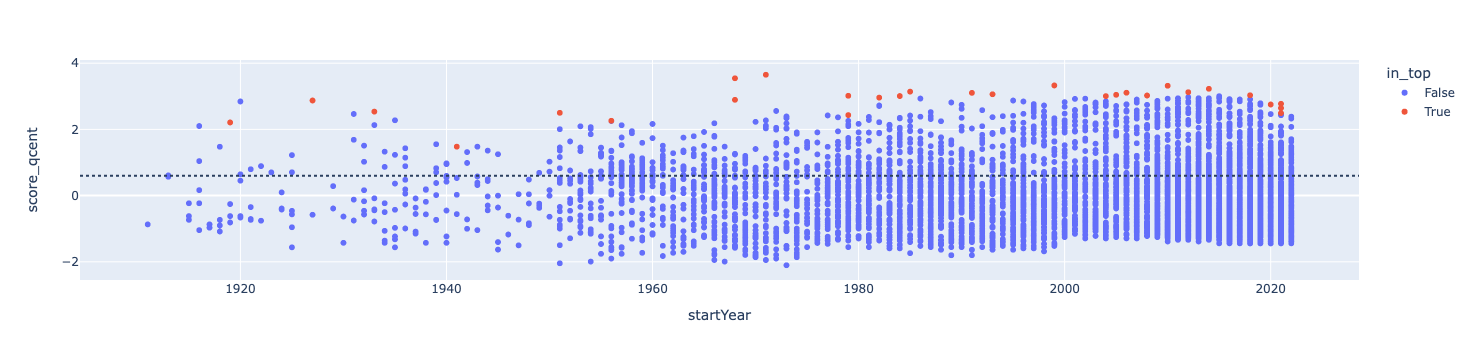

In [151]:
fig = px.scatter(scifi_movies, 'startYear', 'score_qcent', hover_name='primaryTitle', color='in_top')

fig.add_hline(y=0.6, line_dash="dot",
#               annotation_text="Jan 1, 2018 baseline", 
#               annotation_position="bottom right",
#               annotation_font_size=20,
#               annotation_font_color="blue"
             )

<AxesSubplot:>

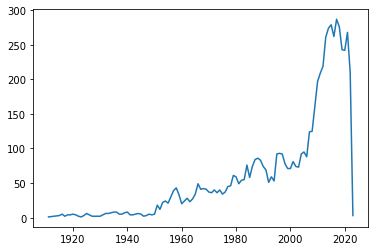

In [137]:
scifi_movies.startYear.value_counts().sort_index().plot()

In [135]:
top_movies

decade      tconst                        primaryTitle
0     1910   tt0010600                            The Doll
1     1920   tt0017136                          Metropolis
2     1930   tt0024216                           King Kong
3     1940   tt0033553             Dr. Jekyll and Mr. Hyde
4     1950   tt0042393                    Destination Moon
5     1950   tt0049366      Invasion of the Body Snatchers
6     1950   tt0043456       The Day the Earth Stood Still
7     1960   tt0060390                      Fahrenheit 451
8     1960   tt0054387                    The Time Machine
9     1960   tt0064112     Kureji no buchamukure daihakken
10    1960   tt0063442                  Planet of the Apes
11    1960   tt0062622               2001: A Space Odyssey
12    1970   tt0075860  Close Encounters of the Third Kind
13    1970   tt0066921                  A Clockwork Orange
14    1970   tt0078748                               Alien
15    1980   tt0083658                        Blade Runner
16    1980   tt0088247                      The Terminator
17    1980   tt0088763                  Back to the Future
18    1990   tt0107290                       Jurassic Park
19    1990   tt0103064          Terminator 2: Judgment Day
20    1990   tt0133093                          The Matrix
21    2000   tt0371746                            Iron Man
22    2000   tt0434409                      V for Vendetta
23    2000   tt0482571                        The Prestige
24    2010   tt0848228                        The Avengers
25    2010   tt0816692                        Interstellar
26    2010   tt1375666                           Inception
27    2020   tt3480822                         Black Widow
28    2020   tt6723592                               Tenet
29    2020  tt11286314                       Don't Look Up

In [145]:
scifi_movies.loc[scifi_movies.in_top].to_csv('data/top_movies_20230118.csv', index=True)

In [157]:
mask = scifi_movies.startYear.between(2020, 2023)
scifi_movies.loc[mask].sort_values(by='score_decade', ascending=False).head(7)

titleType                 primaryTitle  \
tconst                                              
tt11286314     movie                Don't Look Up   
tt6723592      movie                        Tenet   
tt3480822      movie                  Black Widow   
tt8332922      movie        A Quiet Place Part II   
tt10838180     movie     The Matrix Resurrections   
tt7097896      movie  Venom: Let There Be Carnage   
tt5034838      movie            Godzilla vs. Kong   

                          originalTitle isAdult  startYear endYear  \
tconst                                                               
tt11286314                Don't Look Up       0       2021      \N   
tt6723592                         Tenet       0       2020      \N   
tt3480822                   Black Widow       0       2021      \N   
tt8332922         A Quiet Place Part II       0       2020      \N   
tt10838180     The Matrix Resurrections       0       2021      \N   
tt7097896   Venom: Let There Be Carnage       0       2021      \N   
tt5034838             Godzilla vs. Kong       0       2021      \N   

           runtimeMinutes                   genres  averageRating  numVotes  \
tconst                                                                        
tt11286314            138      Comedy,Drama,Sci-Fi            7.2  540466.0   
tt6723592             150   Action,Sci-Fi,Thriller            7.3  510284.0   
tt3480822             134  Action,Adventure,Sci-Fi            6.7  381949.0   
tt8332922              97      Drama,Horror,Sci-Fi            7.2  233325.0   
tt10838180            148            Action,Sci-Fi            5.7  252448.0   
tt7097896              97  Action,Adventure,Sci-Fi            5.9  227163.0   
tt5034838             113   Action,Sci-Fi,Thriller            6.3  211973.0   

            ...   vote_std     score  rtg_std_decade  vote_std_decade  \
tconst      ...                                                         
tt11286314  ...  11.182623  6.169800        1.054358        14.242905   
tt6723592   ...  13.442915  7.404376        1.111816        13.438383   
tt3480822   ...   7.849370  4.362768        0.767066        10.017527   
tt8332922   ...   6.060786  3.681755        1.054358         6.055854   
tt10838180  ...   5.126257  2.720403        0.192482         6.565590   
tt7097896   ...   4.594570  2.510721        0.307399         5.891601   
tt5034838   ...   4.275159  2.463339        0.537232         5.486702   

            score_decade  in_top  qcent  rtg_std_qcent  vote_std_qcent  \
tconst                                                                   
tt11286314      7.648631    True   2000       1.178642        4.657394   
tt6723592       7.275100    True   2000       1.242376        4.385702   
tt3480822       5.392296    True   2000       0.859967        3.230457   
tt8332922       3.555106    True   2000       1.178642        1.892573   
tt10838180      3.379036   False   2000       0.222618        2.064715   
tt7097896       3.099500   False   2000       0.350088        1.837104   
tt5034838       3.011967   False   2000       0.605028        1.700367   

            score_qcent  
tconst                   
tt11286314     2.918018  
tt6723592      2.814039  
tt3480822      2.045212  
tt8332922      1.535607  
tt10838180     1.143667  
tt7097896      1.093596  
tt5034838      1.152697  

[7 rows x 22 columns]

In [188]:
scifi_movies.loc[scifi_movies.primaryTitle.str.contains('Dune')]

titleType           primaryTitle          originalTitle isAdult  \
tconst                                                                       
tt0087182      movie                   Dune                   Dune       0   
tt0099474      movie          Dune Warriors          Dune Warriors       0   
tt11835714     movie           Dune Drifter           Dune Drifter       0   
tt14450978     movie             Dune World             Dune World       0   
tt15331462     movie            Planet Dune            Planet Dune       0   
tt3139486      movie  Stranger in the Dunes  Stranger in the Dunes       0   

            startYear endYear runtimeMinutes                   genres  \
tconst                                                                  
tt0087182        1984      \N            137  Action,Adventure,Sci-Fi   
tt0099474        1991      \N             78  Action,Adventure,Sci-Fi   
tt11835714       2020      \N             98      Action,Drama,Sci-Fi   
tt14450978       2021      \N             70    Action,Fantasy,Sci-Fi   
tt15331462       2021      \N             86  Adventure,Horror,Sci-Fi   
tt3139486        2016      \N             93          Sci-Fi,Thriller   

            averageRating  numVotes  ...   rtg_std  vote_std     score  \
tconst                               ...                                 
tt0087182             6.3  163469.0  ...  0.662841  2.087984  2.087984   
tt0099474             3.9     479.0  ... -0.935629  0.067192  0.067192   
tt11835714            3.4    1350.0  ... -1.095643  0.769659  0.769659   
tt14450978            1.4     428.0  ... -2.100411  0.265808  0.265808   
tt15331462            2.4     759.0  ... -1.538793  0.505108  0.505108   
tt3139486             8.6      33.0  ...  1.967658 -0.807182 -0.807182   

            rtg_std_decade  vote_std_decade  score_decade  rtg_std_qcent  \
tconst                                                                     
tt0087182         0.737050         2.374671      2.374671       0.822048   
tt0099474        -0.837583        -0.003000     -0.003000      -0.988240   
tt11835714       -1.127218         0.846346      0.846346      -1.243266   
tt14450978       -2.281941         0.353383      0.353383      -2.519366   
tt15331462       -1.704580         0.599129      0.599129      -1.881316   
tt3139486         2.082962        -0.782814     -0.782814       2.074595   

            vote_std_qcent  score_qcent  in_top  
tconst                                           
tt0087182         2.331285     2.331285   False  
tt0099474        -0.027769    -0.027769   False  
tt11835714        0.559474     0.559474   False  
tt14450978        0.135556     0.135556   False  
tt15331462        0.346883     0.346883   False  
tt3139486        -0.801269    -0.801269   False  

[6 rows x 22 columns]